In [2]:
import pandas as pd
import numpy as np

file_path = 'power_data/9x18.csv'
df = pd.read_csv(file_path, index_col = False, engine = 'python').dropna()
# n_iter =  508 #10000
n_iter = df['bus_power'].__len__()
array = np.array(df['bus_power'][0:n_iter]) # observations (normal about x, sigma=0.1)

class MovingAverageFilter:
	"""Simple moving average filter"""

	@property
	def avg(self):
		"""Returns current moving average value"""
		return self.__avg

	def __init__(self, n = 20, initial_value = 0):
		"""Inits filter with window size n and initial value"""
		self.__n = n
		self.__buffer = [initial_value/n]*n
		self.__avg = initial_value
		self.__p = 0

	def __call__(self, value):
		"""Consumes next input value"""
		self.__avg -= self.__buffer[self.__p]
		self.__buffer[self.__p] = value/self.__n
		self.__avg += self.__buffer[self.__p]
		self.__p = (self.__p  + 1) % self.__n
		return self.__avg

moving_average_filter = MovingAverageFilter(n= 40, initial_value = array[0])
array_dest = []
for num in array:
	moving_average_filter.__call__(num)
	# ret = moving_average_filter.__call__(num)
	ret = moving_average_filter.avg
	array_dest.append ( ret )
    
from scipy.signal import find_peaks

x = np.array(array_dest)
indices = find_peaks(x, height=0.4, threshold=None, distance=500,
               prominence=None, width=None, wlen=None, rel_height=None,
               plateau_size=None)

def cut(data):
    length=len(data)
    ans=[]
    for i in range(0,length):
        if data[i]-data[0]>0.12 and data[i]<0.6:
            ans.append(i)
    return ans

cut_array=cut(array_dest)    #单按钮序列横坐标

def cut_list(data, n):    #分割为单个list
    res=[[]for i in range(n)]
    cnt=0                 #记录横坐标连续的长度
    k=0                   #第k个list
    length=len(data)
    for i in range(0,length-1):
        if data[i+1]-data[i]==1:     #判断横坐标是否连续
            cnt+=1                   #连续，长度加一
            res[k].append(data[i])   #记录进list
        else:
            if cnt>250:             #连续阈值为250
                res[k].append(data[i])
                k+=1                #满足长度条件
            else:
                res[k]=[]
            cnt=0                   #长度清零
    return res

cut_l=cut_list(cut_array,30)   #单序列横坐标

def single_button_bool(list_ori, list_point):    #若单序列中包含峰值点，则为单按钮序列；否则剔除
    slice_num=len(list_ori)
    ans=[False for i in range(slice_num)]
    for l in range(slice_num):
        if len(list_ori[l])==0:    #若当前单序列为空，抛弃
            continue
        for p in range(len(list_point)-1):
            flag=False    #是否跳过循环
            #if ans[l]==False and cnt<=len(list_ori[l]) and list_ori[l][i]==list_point[p]:
            if ans[l]==False and list_ori[l][0]<=list_point[p] and list_ori[l][len(list_ori[l])-1]>=list_point[p]:
                ans[l]=True      #峰值点匹配成功，当前单序列标记为选中并退出循环
                flag=True
                break
            elif list_ori[l][0]>list_point[p] and list_ori[l][len(list_ori[l])-1]<list_point[p+1]:
                break
        if flag==True:
            continue  #break
    return ans

single_bool= single_button_bool(cut_l, indices[0])

ModuleNotFoundError: No module named 'pandas'

In [21]:
single_bool[0]=False     #手动剔除

In [41]:
def single_button(list_ori, list_bool):   #交叉计算，并将横坐标转换为data值
    ans=[]
    for i in range(len(list_ori)):
        if(list_bool[i]==True):
            tmp=[]
            for l in list_ori[i]:
                tmp.append(array_dest[l])
            ans.append(tmp)
    return ans

single=single_button(cut_l, single_bool)

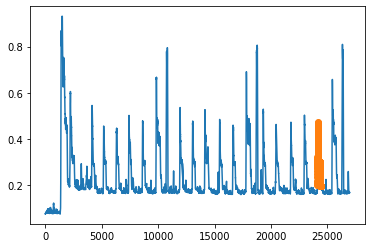

In [31]:
def draw_cutl(n):    
    cutl_p=[]         #单序列纵坐标
    for c in cut_l[n]:
        cutl_p.append(array_dest[c])

    plt.plot(array_dest)
    plt.plot(cut_l[n],cutl_p,"o")
    #plt.xlim(2000,5000)
    plt.show()
    
draw_cutl(18)

In [42]:
len(single)

15

ValueError: x and y must have same first dimension, but have shapes (258,) and (259,)

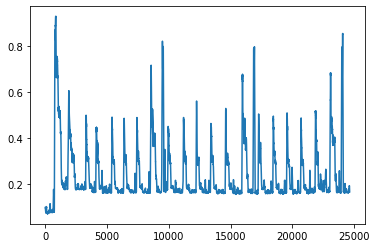

In [25]:
import matplotlib.pyplot as plt
plt.plot(array_dest)
plt.plot(cut_l[16],single[14],"o")
#plt.xlim(700,10000)
plt.show()

## 自动提取

In [43]:
## 自动提取
#dataset=[]
for i in single:
    dataset.append(i)

## 手动提取

In [124]:
## 手动提取
dataset.append(single[17])
len(dataset)

IndexError: list index out of range

In [44]:
len(dataset)

150

In [45]:
dataset_np=np.array(dataset, dtype=object)
np.save('dataset_train.npy', dataset_np)

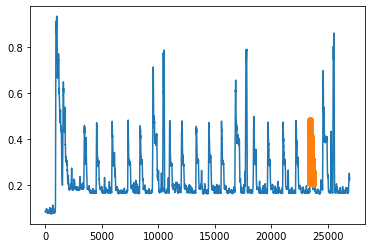

In [47]:
dataset=np.load('dataset_train.npy',allow_pickle=True)
dataset=dataset.tolist()
plt.plot(array_dest)
plt.plot(cut_l[18],dataset[149],"o")
#plt.xlim(700,10000)
plt.show()

In [51]:
data_label=np.load('D:/Codes/python/timit_11/train_label_11.npy')
label=data_label.tolist()
label

['36',
 '36',
 '36',
 '36',
 '36',
 '36',
 '36',
 '36',
 '36',
 '36',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '37',
 '37',
 '37',
 '37',
 '37',
 '37',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '38',
 '38',
 '38',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '38',
 '38',
 '38',
 '38',
 '38',
 '38',
 '25',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '38',
 '38',
 '38',
 '38',
 '38',
 '38',
 '38',
 '30',
 '30',
 '30',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '38',
 '38',
 '38',
 '38',
 '38',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '38',
 '38',
 '27',
 '27',
 '27',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '35',
 '1',


In [57]:
label_before=['0','1','2','3','4','5','6','7','8','9']
label_after=[val for val in label_before for i in range(15)]

In [59]:
label_after_np=label_after()
dataset_np=np.array(dataset, dtype=object)
np.save('dataset_train.npy', dataset_np)

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9']

## Image Dataset

In [2]:
import numpy as np
data_train=np.load('D:/Codes/python/EEG_MI_wavelet_CNN_Test-main/dataset_train.npy', allow_pickle=True)
train=data_train.tolist()
train=np.array(train)

D:\annaconda\setup\envs\pyqt\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [10]:
train[0]

[0.20337500000000036,
 0.20912500000000037,
 0.21337500000000037,
 0.21512500000000037,
 0.21687500000000037,
 0.2292500000000004,
 0.24162500000000042,
 0.24900000000000044,
 0.25637500000000046,
 0.25950000000000045,
 0.27012500000000045,
 0.28075000000000044,
 0.28575000000000045,
 0.29275000000000045,
 0.29512500000000047,
 0.29775000000000046,
 0.30650000000000044,
 0.3107500000000004,
 0.3150000000000004,
 0.31875000000000037,
 0.32250000000000034,
 0.3298750000000003,
 0.33775000000000027,
 0.3427500000000003,
 0.3487500000000003,
 0.3547500000000003,
 0.3643750000000003,
 0.3740000000000003,
 0.3835000000000003,
 0.39275000000000027,
 0.40012500000000023,
 0.4122500000000002,
 0.4243750000000003,
 0.43000000000000027,
 0.43562500000000026,
 0.44425000000000026,
 0.4520000000000003,
 0.45362500000000033,
 0.46362500000000034,
 0.47362500000000035,
 0.47975000000000034,
 0.48587500000000033,
 0.48575000000000035,
 0.48762500000000036,
 0.4955000000000004,
 0.48912500000000037,
 0

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

folder_path="D:\\Codes\\python\\EEG_MI_wavelet_CNN_Test-main\\power_imgset\\8\\"
if not os.path.exists(folder_path):  #判断是否存在文件夹如果不存在则创建为文件夹
    os.makedirs(folder_path)
for i in range(120,135):
    filename=folder_path+str(i-120)+".jpg"
    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.plot(train[i])
    plt.savefig(filename)
    #plt.show()
    plt.close()

In [16]:
str(2)

'2'